In [2]:
import os
import random
import subprocess
from eppy import modeleditor
from eppy.modeleditor import IDF
from SALib.sample import latin

In [3]:
# Stellen Sie sicher, dass der Pfad zu EnergyPlus IDD-Datei korrekt ist
idd_path = '/usr/local/EnergyPlus-9-4-0/Energy+.idd'
IDF.setiddname(idd_path)

In [4]:
# Funktion zum Anpassen der IDF-Datei
def modify_idf(template_path, output_path, cooling_setpoint, people_in_room, cooling_load):
    idf = IDF(template_path)
    print(template_path)
    
    # Cooling Setpoint ändern
    for obj in idf.idfobjects['HVACTemplate:Thermostat']:
        obj.Constant_Cooling_Setpoint = cooling_setpoint
    
    # People in Room ändern
    for obj in idf.idfobjects['PEOPLE']:
        obj.Number_of_People = people_in_room
    
    # Cooling Load ändern (z.B., durch Ändern von Equipment oder Zone Sizing)
    for obj in idf.idfobjects['HVACTemplate:Zone:IdealLoadsAirSystem']:
        obj.Maximum_Total_Cooling_Capacity = cooling_load
    
    # Geänderte IDF-Datei speichern
    idf.save(output_path)

# Funktion zum Ausführen der Simulation
def run_simulation(idf_path, output_dir):
    # command = f"energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d {output_dir} {idf_path}"
    command = "energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d " + output_dir + " " + idf_path
    # command = "energyplus", "-r", "-x", "-w", "AUT_ST_Graz.Univ.112900_TMYx.epw", "-d", output_dir , idf_path
    print(command)
    subprocess.run(command, shell=True)


In [5]:
# Pfade
# template_idf_path = "/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf"
template_idf_path = "/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf"
simulation_dir = "simulations" 

# Sicherstellen, dass das Ausgabeverzeichnis existiert
if not os.path.exists(simulation_dir):
    os.makedirs(simulation_dir)


# Define the problem for LHS
problem = {
    'num_vars': 3,
    'names': ['cooling_setpoint', 'people_in_room', 'cooling_load'],
    'bounds': [[15, 30],   # Cooling setpoint range
               [0, 6],    # People in room range
               [0, 1000]] # Cooling load range
}

# Generate LHS samples
samples = latin.sample(problem, 1000)

# Simulationen durchführen
for i, sample in enumerate(samples):
    cooling_setpoint = sample[0]
    people_in_room = sample[1]
    cooling_load = sample[2]
    print(i)
    output_idf_path = os.path.join(simulation_dir, "simulation_" + str(i)+ ".idf")
    output_simulation_dir = os.path.join(simulation_dir, f'result_{i}' + "/")
    # print(output_simulation_dir)

    if not os.path.exists(output_simulation_dir):
        os.makedirs(output_simulation_dir)

    # IDF-Datei anpassen
    modify_idf(template_idf_path, output_idf_path, cooling_setpoint, people_in_room, cooling_load)
    
    # Simulation ausführen
    # run_simulation(output_idf_path, output_simulation_dir)
    idf_name = "simulation_" + str(i) + ".idf"
    # print(idf_name)
    # run_simulation(idf_name, output_simulation_dir)
    run_simulation(output_idf_path, output_simulation_dir)


0
/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_0/ simulations/simulation_0.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.062
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:00


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_1/ simulations/simulation_1.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.053
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:00


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_2/ simulations/simulation_2.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.053
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:00


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_3/ simulations/simulation_3.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.064
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:00


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_4/ simulations/simulation_4.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.064
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:00


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_5/ simulations/simulation_5.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.058
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:00


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_6/ simulations/simulation_6.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.059
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:01


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_7/ simulations/simulation_7.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.065
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:01


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_8/ simulations/simulation_8.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.057
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:01


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_9/ simulations/simulation_9.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:01


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_10/ simulations/simulation_10.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.053
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:01


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_11/ simulations/simulation_11.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:01


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_12/ simulations/simulation_12.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.053
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:01


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_13/ simulations/simulation_13.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:01


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_14/ simulations/simulation_14.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:01


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_15/ simulations/simulation_15.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:01


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_16/ simulations/simulation_16.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.055
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:01


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_17/ simulations/simulation_17.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:01


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_18/ simulations/simulation_18.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:01


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_19/ simulations/simulation_19.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:01


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_20/ simulations/simulation_20.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.056
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:01


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_21/ simulations/simulation_21.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.059
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:01


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_22/ simulations/simulation_22.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.060
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:01


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_23/ simulations/simulation_23.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:01


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_24/ simulations/simulation_24.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.057
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:01


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_25/ simulations/simulation_25.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.056
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:02


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_26/ simulations/simulation_26.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.065
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:02


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_27/ simulations/simulation_27.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.058
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:02


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_28/ simulations/simulation_28.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.056
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:02


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_29/ simulations/simulation_29.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:02


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_30/ simulations/simulation_30.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.053
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:02


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_31/ simulations/simulation_31.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.055
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:02


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_32/ simulations/simulation_32.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.055
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:02


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_33/ simulations/simulation_33.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:02


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_34/ simulations/simulation_34.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.055
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:02


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_35/ simulations/simulation_35.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.057
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:02


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_36/ simulations/simulation_36.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:02


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_37/ simulations/simulation_37.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:02


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_38/ simulations/simulation_38.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:02


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_39/ simulations/simulation_39.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.055
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:02


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_40/ simulations/simulation_40.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.055
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:02


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_41/ simulations/simulation_41.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.055
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:02


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_42/ simulations/simulation_42.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.104
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:02


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_43/ simulations/simulation_43.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.073
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:03


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_44/ simulations/simulation_44.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.101
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:03


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_45/ simulations/simulation_45.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.129
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:03


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_46/ simulations/simulation_46.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.097
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:03


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_47/ simulations/simulation_47.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.055
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:03


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_48/ simulations/simulation_48.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.053
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:03


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_49/ simulations/simulation_49.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:03


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_50/ simulations/simulation_50.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:03


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_51/ simulations/simulation_51.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.055
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:03


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_52/ simulations/simulation_52.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:03


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_53/ simulations/simulation_53.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.055
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:03


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_54/ simulations/simulation_54.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:03


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_55/ simulations/simulation_55.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.057
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:03


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_56/ simulations/simulation_56.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.055
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:03


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_57/ simulations/simulation_57.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:03


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_58/ simulations/simulation_58.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:04


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_59/ simulations/simulation_59.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.057
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:04


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_60/ simulations/simulation_60.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.109
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:04


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_61/ simulations/simulation_61.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:04


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_62/ simulations/simulation_62.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.053
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:04


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_63/ simulations/simulation_63.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:04


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_64/ simulations/simulation_64.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.055
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:04


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_65/ simulations/simulation_65.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:04


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_66/ simulations/simulation_66.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:04


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_67/ simulations/simulation_67.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.055
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:04


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_68/ simulations/simulation_68.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.055
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:04


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_69/ simulations/simulation_69.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.056
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:04


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_70/ simulations/simulation_70.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.053
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:04


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_71/ simulations/simulation_71.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.053
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:04


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_72/ simulations/simulation_72.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:04


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_73/ simulations/simulation_73.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.126
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:04


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_74/ simulations/simulation_74.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.053
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:04


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_75/ simulations/simulation_75.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:05


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_76/ simulations/simulation_76.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:05


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_77/ simulations/simulation_77.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.109
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:05


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_78/ simulations/simulation_78.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:05


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_79/ simulations/simulation_79.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:05


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_80/ simulations/simulation_80.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.053
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:05


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_81/ simulations/simulation_81.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.055
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:05


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_82/ simulations/simulation_82.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.055
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:05


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_83/ simulations/simulation_83.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:05


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_84/ simulations/simulation_84.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.053
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:05


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_85/ simulations/simulation_85.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.053
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:05


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_86/ simulations/simulation_86.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.055
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:05


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_87/ simulations/simulation_87.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.053
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:05


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_88/ simulations/simulation_88.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:05


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_89/ simulations/simulation_89.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.053
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:05


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_90/ simulations/simulation_90.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.065
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:05


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_91/ simulations/simulation_91.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.053
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:06


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_92/ simulations/simulation_92.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.053
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:06


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_93/ simulations/simulation_93.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:06


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_94/ simulations/simulation_94.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.076
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:06


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_95/ simulations/simulation_95.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.053
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:06


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_96/ simulations/simulation_96.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.053
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:06


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_97/ simulations/simulation_97.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:06


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_98/ simulations/simulation_98.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.075
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:06


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_99/ simulations/simulation_99.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.055
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:06


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_100/ simulations/simulation_100.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:06


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_101/ simulations/simulation_101.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:06


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_102/ simulations/simulation_102.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.056
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:06


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_103/ simulations/simulation_103.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:06


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_104/ simulations/simulation_104.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.053
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:06


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_105/ simulations/simulation_105.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:06


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_106/ simulations/simulation_106.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:06


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_107/ simulations/simulation_107.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.056
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:06


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_108/ simulations/simulation_108.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.057
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:07


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_109/ simulations/simulation_109.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:07


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_110/ simulations/simulation_110.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.055
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:07


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_111/ simulations/simulation_111.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.126
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:07


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_112/ simulations/simulation_112.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:07


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_113/ simulations/simulation_113.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:07


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_114/ simulations/simulation_114.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:07


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_115/ simulations/simulation_115.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.055
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:07


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_116/ simulations/simulation_116.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.053
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:07


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_117/ simulations/simulation_117.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:07


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_118/ simulations/simulation_118.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:07


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_119/ simulations/simulation_119.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:07


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_120/ simulations/simulation_120.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.056
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:07


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_121/ simulations/simulation_121.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.053
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:07


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_122/ simulations/simulation_122.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:07


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_123/ simulations/simulation_123.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:07


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_124/ simulations/simulation_124.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:07


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_125/ simulations/simulation_125.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.060
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:08


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_126/ simulations/simulation_126.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:08


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_127/ simulations/simulation_127.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.055
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:08


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_128/ simulations/simulation_128.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.107
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:08


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_129/ simulations/simulation_129.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.055
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:08


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_130/ simulations/simulation_130.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:08


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_131/ simulations/simulation_131.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.053
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:08


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_132/ simulations/simulation_132.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.099
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:08


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_133/ simulations/simulation_133.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:08


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_134/ simulations/simulation_134.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.058
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:08


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_135/ simulations/simulation_135.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.058
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:08


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_136/ simulations/simulation_136.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.059
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:08


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_137/ simulations/simulation_137.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:08


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_138/ simulations/simulation_138.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.053
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:08


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_139/ simulations/simulation_139.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.053
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:08


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_140/ simulations/simulation_140.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:08


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_141/ simulations/simulation_141.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.069
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:08


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_142/ simulations/simulation_142.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:09


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_143/ simulations/simulation_143.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:09


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_144/ simulations/simulation_144.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.053
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:09


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_145/ simulations/simulation_145.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.061
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:09


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_146/ simulations/simulation_146.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:09


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_147/ simulations/simulation_147.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:09


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_148/ simulations/simulation_148.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.056
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:09


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_149/ simulations/simulation_149.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.085
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:09


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_150/ simulations/simulation_150.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.053
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:09


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_151/ simulations/simulation_151.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.053
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:09


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_152/ simulations/simulation_152.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:09


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_153/ simulations/simulation_153.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:09


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_154/ simulations/simulation_154.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:09


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_155/ simulations/simulation_155.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.053
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:09


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_156/ simulations/simulation_156.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.053
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:09


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_157/ simulations/simulation_157.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.053
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:09


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_158/ simulations/simulation_158.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:09


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_159/ simulations/simulation_159.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.053
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:10


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_160/ simulations/simulation_160.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.058
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:10


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_161/ simulations/simulation_161.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.056
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:10


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_162/ simulations/simulation_162.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.113
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:10


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_163/ simulations/simulation_163.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.053
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:10


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_164/ simulations/simulation_164.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.053
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:10


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_165/ simulations/simulation_165.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.053
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:10


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_166/ simulations/simulation_166.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.065
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:10


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_167/ simulations/simulation_167.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.066
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:10


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_168/ simulations/simulation_168.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.058
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:10


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_169/ simulations/simulation_169.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.065
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:10


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_170/ simulations/simulation_170.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.088
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:10


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_171/ simulations/simulation_171.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.053
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:10


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_172/ simulations/simulation_172.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.053
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:10


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_173/ simulations/simulation_173.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:10


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_174/ simulations/simulation_174.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.067
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:10


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_175/ simulations/simulation_175.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.055
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:10


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_176/ simulations/simulation_176.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.064
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:11


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_177/ simulations/simulation_177.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:11


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_178/ simulations/simulation_178.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.055
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:11


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_179/ simulations/simulation_179.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:11


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_180/ simulations/simulation_180.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.055
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:11


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_181/ simulations/simulation_181.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.053
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:11


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_182/ simulations/simulation_182.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.055
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:11


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_183/ simulations/simulation_183.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.055
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:11


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_184/ simulations/simulation_184.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.055
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:11


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_185/ simulations/simulation_185.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.053
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:11


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_186/ simulations/simulation_186.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.057
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:11


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_187/ simulations/simulation_187.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.053
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:11


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_188/ simulations/simulation_188.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:11


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_189/ simulations/simulation_189.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:11


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_190/ simulations/simulation_190.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.055
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:11


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_191/ simulations/simulation_191.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.055
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:11


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_192/ simulations/simulation_192.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.055
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:12


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_193/ simulations/simulation_193.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.053
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:12


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_194/ simulations/simulation_194.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.053
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:12


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_195/ simulations/simulation_195.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.058
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:12


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_196/ simulations/simulation_196.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:12


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_197/ simulations/simulation_197.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:12


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_198/ simulations/simulation_198.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.065
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:12


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_199/ simulations/simulation_199.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.077
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:12


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_200/ simulations/simulation_200.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.066
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:12


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_201/ simulations/simulation_201.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.053
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:12


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_202/ simulations/simulation_202.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.053
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:12


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_203/ simulations/simulation_203.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.115
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:12


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_204/ simulations/simulation_204.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.056
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:12


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_205/ simulations/simulation_205.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.053
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:12


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_206/ simulations/simulation_206.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.053
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:12


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_207/ simulations/simulation_207.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.080
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:12


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_208/ simulations/simulation_208.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.053
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:13


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_209/ simulations/simulation_209.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:13


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_210/ simulations/simulation_210.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.053
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:13


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_211/ simulations/simulation_211.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.083
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:13


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_212/ simulations/simulation_212.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.055
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:13


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_213/ simulations/simulation_213.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.053
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:13


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_214/ simulations/simulation_214.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.057
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:13


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_215/ simulations/simulation_215.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.065
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:13


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_216/ simulations/simulation_216.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.062
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:13


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_217/ simulations/simulation_217.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.059
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:13


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_218/ simulations/simulation_218.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.058
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:13


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_219/ simulations/simulation_219.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.066
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:13


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_220/ simulations/simulation_220.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:13


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_221/ simulations/simulation_221.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:13


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_222/ simulations/simulation_222.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:13


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_223/ simulations/simulation_223.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.055
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:13


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_224/ simulations/simulation_224.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.053
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:13


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_225/ simulations/simulation_225.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.055
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:14


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_226/ simulations/simulation_226.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.055
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:14


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_227/ simulations/simulation_227.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.055
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:14


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_228/ simulations/simulation_228.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:14


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_229/ simulations/simulation_229.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.053
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:14


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_230/ simulations/simulation_230.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:14


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_231/ simulations/simulation_231.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.065
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:14


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_232/ simulations/simulation_232.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.055
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:14


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_233/ simulations/simulation_233.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.055
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:14


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_234/ simulations/simulation_234.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.057
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:14


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_235/ simulations/simulation_235.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.060
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:14


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_236/ simulations/simulation_236.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.088
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:14


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_237/ simulations/simulation_237.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.055
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:14


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_238/ simulations/simulation_238.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.055
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:14


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_239/ simulations/simulation_239.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.053
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:14


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_240/ simulations/simulation_240.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.097
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:14


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_241/ simulations/simulation_241.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.072
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:15


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_242/ simulations/simulation_242.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.056
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:15


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_243/ simulations/simulation_243.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.065
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:15


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_244/ simulations/simulation_244.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.082
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:15


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_245/ simulations/simulation_245.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:15


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_246/ simulations/simulation_246.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:15


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_247/ simulations/simulation_247.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:15


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_248/ simulations/simulation_248.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.118
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:15


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_249/ simulations/simulation_249.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:15


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_250/ simulations/simulation_250.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:15


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_251/ simulations/simulation_251.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:15


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_252/ simulations/simulation_252.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.069
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:15


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_253/ simulations/simulation_253.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.056
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:15


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_254/ simulations/simulation_254.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:15


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_255/ simulations/simulation_255.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:15


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_256/ simulations/simulation_256.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.107
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:15


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_257/ simulations/simulation_257.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:16


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_258/ simulations/simulation_258.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.053
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:16


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_259/ simulations/simulation_259.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.053
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:16


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_260/ simulations/simulation_260.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.115
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:16


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_261/ simulations/simulation_261.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:16


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_262/ simulations/simulation_262.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.057
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:16


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_263/ simulations/simulation_263.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.066
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:16


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_264/ simulations/simulation_264.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.064
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:16


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_265/ simulations/simulation_265.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:16


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_266/ simulations/simulation_266.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.055
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:16


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_267/ simulations/simulation_267.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.064
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:16


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_268/ simulations/simulation_268.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.129
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:16


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_269/ simulations/simulation_269.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.053
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:16


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_270/ simulations/simulation_270.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.053
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:16


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_271/ simulations/simulation_271.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:16


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_272/ simulations/simulation_272.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.128
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:16


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_273/ simulations/simulation_273.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:17


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_274/ simulations/simulation_274.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:17


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_275/ simulations/simulation_275.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:17


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_276/ simulations/simulation_276.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.132
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:17


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_277/ simulations/simulation_277.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.058
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:17


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_278/ simulations/simulation_278.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:17


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_279/ simulations/simulation_279.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.053
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:17


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_280/ simulations/simulation_280.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.113
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:17


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_281/ simulations/simulation_281.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.053
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:17


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_282/ simulations/simulation_282.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.055
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:17


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_283/ simulations/simulation_283.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.053
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:17


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_284/ simulations/simulation_284.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.106
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:17


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_285/ simulations/simulation_285.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:17


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_286/ simulations/simulation_286.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.053
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:17


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_287/ simulations/simulation_287.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.055
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:17


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_288/ simulations/simulation_288.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.108
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:17


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_289/ simulations/simulation_289.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.053
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:18


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_290/ simulations/simulation_290.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.055
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:18


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_291/ simulations/simulation_291.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.053
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:18


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_292/ simulations/simulation_292.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.113
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:18


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_293/ simulations/simulation_293.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:18


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_294/ simulations/simulation_294.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.053
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:18


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_295/ simulations/simulation_295.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.065
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:18


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_296/ simulations/simulation_296.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.102
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:18


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_297/ simulations/simulation_297.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.056
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:18


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_298/ simulations/simulation_298.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.069
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:18


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_299/ simulations/simulation_299.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.059
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:18


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_300/ simulations/simulation_300.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.063
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:18


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_301/ simulations/simulation_301.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:18


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_302/ simulations/simulation_302.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.055
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:18


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_303/ simulations/simulation_303.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:18


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_304/ simulations/simulation_304.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.066
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:18


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_305/ simulations/simulation_305.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.053
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:19


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_306/ simulations/simulation_306.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:19


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_307/ simulations/simulation_307.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:19


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_308/ simulations/simulation_308.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.099
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:19


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_309/ simulations/simulation_309.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.072
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:19


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_310/ simulations/simulation_310.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.064
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:19


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_311/ simulations/simulation_311.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.053
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:19


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_312/ simulations/simulation_312.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.107
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:19


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_313/ simulations/simulation_313.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.055
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:19


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_314/ simulations/simulation_314.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:19


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_315/ simulations/simulation_315.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.063
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:19


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_316/ simulations/simulation_316.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.120
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:19


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_317/ simulations/simulation_317.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.053
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:19


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_318/ simulations/simulation_318.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:19


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_319/ simulations/simulation_319.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.055
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:19


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_320/ simulations/simulation_320.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.084
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:19


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_321/ simulations/simulation_321.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.066
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:20


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_322/ simulations/simulation_322.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.055
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:20


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_323/ simulations/simulation_323.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:20


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_324/ simulations/simulation_324.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.071
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:20


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_325/ simulations/simulation_325.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:20


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_326/ simulations/simulation_326.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:20


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_327/ simulations/simulation_327.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.058
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:20


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_328/ simulations/simulation_328.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.104
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:20


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_329/ simulations/simulation_329.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.055
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:20


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_330/ simulations/simulation_330.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.053
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:20


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_331/ simulations/simulation_331.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:20


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_332/ simulations/simulation_332.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.061
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:20


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_333/ simulations/simulation_333.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:20


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_334/ simulations/simulation_334.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:20


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_335/ simulations/simulation_335.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.055
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:20


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_336/ simulations/simulation_336.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.100
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:20


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_337/ simulations/simulation_337.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.065
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:21


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_338/ simulations/simulation_338.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:21


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_339/ simulations/simulation_339.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.053
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:21


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_340/ simulations/simulation_340.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.112
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:21


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_341/ simulations/simulation_341.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.055
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:21


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_342/ simulations/simulation_342.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:21


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_343/ simulations/simulation_343.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.053
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:21


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_344/ simulations/simulation_344.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.066
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:21


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_345/ simulations/simulation_345.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:21


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_346/ simulations/simulation_346.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.058
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:21


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_347/ simulations/simulation_347.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.060
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:21


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_348/ simulations/simulation_348.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.124
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:21


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_349/ simulations/simulation_349.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.053
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:21


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_350/ simulations/simulation_350.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:21


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_351/ simulations/simulation_351.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:21


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_352/ simulations/simulation_352.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.124
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:21


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_353/ simulations/simulation_353.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.065
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:22


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_354/ simulations/simulation_354.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:22


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_355/ simulations/simulation_355.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.053
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:22


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_356/ simulations/simulation_356.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.082
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:22


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_357/ simulations/simulation_357.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.060
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:22


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_358/ simulations/simulation_358.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.064
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:22


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_359/ simulations/simulation_359.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.053
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:22


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_360/ simulations/simulation_360.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.068
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:22


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_361/ simulations/simulation_361.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.053
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:22


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_362/ simulations/simulation_362.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.053
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:22


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_363/ simulations/simulation_363.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.063
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:22


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_364/ simulations/simulation_364.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.085
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:22


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_365/ simulations/simulation_365.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.053
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:22


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_366/ simulations/simulation_366.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.053
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:22


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_367/ simulations/simulation_367.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.055
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:22


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_368/ simulations/simulation_368.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.113
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:22


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_369/ simulations/simulation_369.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:23


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_370/ simulations/simulation_370.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.053
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:23


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_371/ simulations/simulation_371.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:23


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_372/ simulations/simulation_372.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.065
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:23


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_373/ simulations/simulation_373.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.055
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:23


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_374/ simulations/simulation_374.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.058
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:23


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_375/ simulations/simulation_375.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.058
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:23


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_376/ simulations/simulation_376.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.061
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:23


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_377/ simulations/simulation_377.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.053
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:23


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_378/ simulations/simulation_378.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:23


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_379/ simulations/simulation_379.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:23


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_380/ simulations/simulation_380.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.139
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:23


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_381/ simulations/simulation_381.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.067
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:23


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_382/ simulations/simulation_382.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.058
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:23


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_383/ simulations/simulation_383.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:23


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_384/ simulations/simulation_384.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.060
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:23


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_385/ simulations/simulation_385.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.055
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:24


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_386/ simulations/simulation_386.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:24


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_387/ simulations/simulation_387.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:24


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_388/ simulations/simulation_388.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.074
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:24


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_389/ simulations/simulation_389.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:24


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_390/ simulations/simulation_390.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:24


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_391/ simulations/simulation_391.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.055
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:24


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_392/ simulations/simulation_392.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.053
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:24


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_393/ simulations/simulation_393.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.053
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:24


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_394/ simulations/simulation_394.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.055
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:24


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_395/ simulations/simulation_395.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.055
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:24


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_396/ simulations/simulation_396.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.060
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:24


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_397/ simulations/simulation_397.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.060
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:24


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_398/ simulations/simulation_398.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:24


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_399/ simulations/simulation_399.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.053
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:24


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_400/ simulations/simulation_400.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:24


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_401/ simulations/simulation_401.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.055
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:25


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_402/ simulations/simulation_402.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.065
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:25


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_403/ simulations/simulation_403.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.064
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:25


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_404/ simulations/simulation_404.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.067
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:25


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_405/ simulations/simulation_405.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.055
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:25


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_406/ simulations/simulation_406.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.055
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:25


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_407/ simulations/simulation_407.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.056
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:25


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_408/ simulations/simulation_408.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.117
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:25


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_409/ simulations/simulation_409.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.053
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:25


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_410/ simulations/simulation_410.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.067
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:25


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_411/ simulations/simulation_411.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:25


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_412/ simulations/simulation_412.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.123
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:25


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_413/ simulations/simulation_413.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.055
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:25


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_414/ simulations/simulation_414.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.055
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:25


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_415/ simulations/simulation_415.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.061
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:25


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_416/ simulations/simulation_416.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.056
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:26


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_417/ simulations/simulation_417.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.058
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:26


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_418/ simulations/simulation_418.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.066
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:26


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_419/ simulations/simulation_419.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.053
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:26


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_420/ simulations/simulation_420.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.060
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:26


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_421/ simulations/simulation_421.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.062
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:26


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_422/ simulations/simulation_422.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.061
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:26


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_423/ simulations/simulation_423.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.053
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:26


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_424/ simulations/simulation_424.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.057
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:26


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_425/ simulations/simulation_425.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.057
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:26


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_426/ simulations/simulation_426.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:26


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_427/ simulations/simulation_427.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.056
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:26


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_428/ simulations/simulation_428.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:26


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_429/ simulations/simulation_429.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.065
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:26


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_430/ simulations/simulation_430.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.058
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:26


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_431/ simulations/simulation_431.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.055
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:26


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_432/ simulations/simulation_432.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.057
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:27


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_433/ simulations/simulation_433.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.053
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:27


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_434/ simulations/simulation_434.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.059
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:27


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_435/ simulations/simulation_435.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.060
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:27


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_436/ simulations/simulation_436.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:27


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_437/ simulations/simulation_437.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.053
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:27


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_438/ simulations/simulation_438.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.059
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:27


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_439/ simulations/simulation_439.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.070
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:27


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_440/ simulations/simulation_440.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.058
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:27


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_441/ simulations/simulation_441.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.084
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:27


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_442/ simulations/simulation_442.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:27


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_443/ simulations/simulation_443.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.053
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:27


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_444/ simulations/simulation_444.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.058
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:27


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_445/ simulations/simulation_445.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.065
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:27


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_446/ simulations/simulation_446.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.056
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:27


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_447/ simulations/simulation_447.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.053
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:27


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_448/ simulations/simulation_448.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.053
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:28


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_449/ simulations/simulation_449.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.057
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:28


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_450/ simulations/simulation_450.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.058
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:28


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_451/ simulations/simulation_451.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.061
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:28


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_452/ simulations/simulation_452.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.067
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:28


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_453/ simulations/simulation_453.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.067
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:28


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_454/ simulations/simulation_454.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.059
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:28


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_455/ simulations/simulation_455.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.057
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:28


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_456/ simulations/simulation_456.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.061
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:28


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_457/ simulations/simulation_457.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:28


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_458/ simulations/simulation_458.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:28


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_459/ simulations/simulation_459.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.056
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:28


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_460/ simulations/simulation_460.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.080
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:28


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_461/ simulations/simulation_461.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:28


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_462/ simulations/simulation_462.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.056
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:28


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_463/ simulations/simulation_463.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.056
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:28


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


464
/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_464/ simulations/simulation_464.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.123
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:29


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_465/ simulations/simulation_465.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:29


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_466/ simulations/simulation_466.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:29


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_467/ simulations/simulation_467.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.056
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:29


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_468/ simulations/simulation_468.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.072
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:29


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_469/ simulations/simulation_469.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.053
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:29


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_470/ simulations/simulation_470.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.055
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:29


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_471/ simulations/simulation_471.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.065
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:29


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_472/ simulations/simulation_472.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:29


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_473/ simulations/simulation_473.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.062
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:29


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_474/ simulations/simulation_474.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.061
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:29


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_475/ simulations/simulation_475.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.057
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:29


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_476/ simulations/simulation_476.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.057
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:29


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_477/ simulations/simulation_477.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:29


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_478/ simulations/simulation_478.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.065
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:29


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_479/ simulations/simulation_479.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:29


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_480/ simulations/simulation_480.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.064
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:30


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_481/ simulations/simulation_481.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.053
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:30


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_482/ simulations/simulation_482.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.062
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:30


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_483/ simulations/simulation_483.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.060
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:30


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_484/ simulations/simulation_484.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.060
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:30


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_485/ simulations/simulation_485.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.059
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:30


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_486/ simulations/simulation_486.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:30


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_487/ simulations/simulation_487.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.055
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:30


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_488/ simulations/simulation_488.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.056
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:30


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_489/ simulations/simulation_489.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.055
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:30


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_490/ simulations/simulation_490.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.056
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:30


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_491/ simulations/simulation_491.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.055
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:30


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_492/ simulations/simulation_492.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.059
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:30


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_493/ simulations/simulation_493.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:30


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_494/ simulations/simulation_494.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:30


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_495/ simulations/simulation_495.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.069
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:30


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_496/ simulations/simulation_496.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.061
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:31


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_497/ simulations/simulation_497.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.053
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:31


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_498/ simulations/simulation_498.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.053
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:31


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_499/ simulations/simulation_499.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.055
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:31


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_500/ simulations/simulation_500.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:31


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_501/ simulations/simulation_501.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.061
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:31


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_502/ simulations/simulation_502.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.058
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:31


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_503/ simulations/simulation_503.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.055
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:31


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_504/ simulations/simulation_504.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.053
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:31


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_505/ simulations/simulation_505.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.053
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:31


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_506/ simulations/simulation_506.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.073
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:31


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_507/ simulations/simulation_507.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.057
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:31


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_508/ simulations/simulation_508.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.061
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:31


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_509/ simulations/simulation_509.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.053
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:31


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_510/ simulations/simulation_510.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.055
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:31


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_511/ simulations/simulation_511.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.056
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:31


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_512/ simulations/simulation_512.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:32


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_513/ simulations/simulation_513.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.055
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:32


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_514/ simulations/simulation_514.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.061
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:32


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_515/ simulations/simulation_515.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:32


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_516/ simulations/simulation_516.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.056
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:32


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_517/ simulations/simulation_517.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:32


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_518/ simulations/simulation_518.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.060
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:32


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_519/ simulations/simulation_519.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.072
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:32


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_520/ simulations/simulation_520.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.055
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:32


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_521/ simulations/simulation_521.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.058
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:32


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_522/ simulations/simulation_522.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.060
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:32


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_523/ simulations/simulation_523.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.057
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:32


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_524/ simulations/simulation_524.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:32


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_525/ simulations/simulation_525.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.053
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:32


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_526/ simulations/simulation_526.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:32


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_527/ simulations/simulation_527.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:32


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_528/ simulations/simulation_528.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.070
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:33


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_529/ simulations/simulation_529.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.056
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:33


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_530/ simulations/simulation_530.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.101
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:33


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_531/ simulations/simulation_531.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:33


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_532/ simulations/simulation_532.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.055
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:33


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_533/ simulations/simulation_533.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.055
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:33


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_534/ simulations/simulation_534.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.064
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:33


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_535/ simulations/simulation_535.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.066
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:33


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_536/ simulations/simulation_536.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.060
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:33


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_537/ simulations/simulation_537.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.069
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:33


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_538/ simulations/simulation_538.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.057
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:33


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_539/ simulations/simulation_539.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.057
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:33


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_540/ simulations/simulation_540.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.061
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:33


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_541/ simulations/simulation_541.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.055
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:33


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_542/ simulations/simulation_542.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.057
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:33


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_543/ simulations/simulation_543.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.055
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:33


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_544/ simulations/simulation_544.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.059
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:34


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_545/ simulations/simulation_545.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.060
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:34


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_546/ simulations/simulation_546.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.057
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:34


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_547/ simulations/simulation_547.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.071
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:34


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_548/ simulations/simulation_548.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.063
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:34


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_549/ simulations/simulation_549.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.057
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:34


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_550/ simulations/simulation_550.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.058
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:34


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_551/ simulations/simulation_551.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:34


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_552/ simulations/simulation_552.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.063
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:34


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_553/ simulations/simulation_553.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.066
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:34


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_554/ simulations/simulation_554.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.063
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:34


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_555/ simulations/simulation_555.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:34


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_556/ simulations/simulation_556.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:34


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_557/ simulations/simulation_557.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:34


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_558/ simulations/simulation_558.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.067
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:34


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_559/ simulations/simulation_559.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.060
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:34


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_560/ simulations/simulation_560.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.053
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:35


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_561/ simulations/simulation_561.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.066
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:35


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_562/ simulations/simulation_562.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:35


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_563/ simulations/simulation_563.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.061
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:35


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_564/ simulations/simulation_564.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.059
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:35


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_565/ simulations/simulation_565.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.055
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:35


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_566/ simulations/simulation_566.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.057
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:35


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_567/ simulations/simulation_567.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:35


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_568/ simulations/simulation_568.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.079
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:35


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_569/ simulations/simulation_569.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.056
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:35


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_570/ simulations/simulation_570.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.064
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:35


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_571/ simulations/simulation_571.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:35


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_572/ simulations/simulation_572.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.062
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:35


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_573/ simulations/simulation_573.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.061
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:35


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_574/ simulations/simulation_574.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:35


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_575/ simulations/simulation_575.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:35


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_576/ simulations/simulation_576.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.053
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:36


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_577/ simulations/simulation_577.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.066
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:36


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_578/ simulations/simulation_578.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.058
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:36


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_579/ simulations/simulation_579.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.056
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:36


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_580/ simulations/simulation_580.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:36


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_581/ simulations/simulation_581.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.057
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:36


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_582/ simulations/simulation_582.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:36


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_583/ simulations/simulation_583.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.059
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:36


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_584/ simulations/simulation_584.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.062
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:36


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_585/ simulations/simulation_585.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:36


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_586/ simulations/simulation_586.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.055
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:36


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_587/ simulations/simulation_587.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:36


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_588/ simulations/simulation_588.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.055
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:36


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_589/ simulations/simulation_589.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:36


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_590/ simulations/simulation_590.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.055
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:36


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_591/ simulations/simulation_591.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:36


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_592/ simulations/simulation_592.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.060
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:37


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_593/ simulations/simulation_593.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.056
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:37


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_594/ simulations/simulation_594.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:37


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_595/ simulations/simulation_595.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.074
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:37


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_596/ simulations/simulation_596.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.057
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:37


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_597/ simulations/simulation_597.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:37


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_598/ simulations/simulation_598.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.058
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:37


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_599/ simulations/simulation_599.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.113
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:37


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_600/ simulations/simulation_600.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.060
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:37


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_601/ simulations/simulation_601.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.071
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:37


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_602/ simulations/simulation_602.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.059
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:37


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_603/ simulations/simulation_603.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.059
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:37


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_604/ simulations/simulation_604.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.083
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:37


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_605/ simulations/simulation_605.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.055
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:37


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_606/ simulations/simulation_606.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.056
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:37


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_607/ simulations/simulation_607.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.056
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:38


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_608/ simulations/simulation_608.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.055
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:38


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_609/ simulations/simulation_609.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.066
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:38


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_610/ simulations/simulation_610.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.081
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:38


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_611/ simulations/simulation_611.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.067
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:38


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_612/ simulations/simulation_612.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.063
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:38


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_613/ simulations/simulation_613.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:38


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_614/ simulations/simulation_614.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.074
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:38


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_615/ simulations/simulation_615.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:38


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_616/ simulations/simulation_616.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.055
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:38


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_617/ simulations/simulation_617.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.065
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:38


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_618/ simulations/simulation_618.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.058
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:38


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_619/ simulations/simulation_619.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.068
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:38


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_620/ simulations/simulation_620.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.078
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:38


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_621/ simulations/simulation_621.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.063
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:38


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_622/ simulations/simulation_622.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.056
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:39


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_623/ simulations/simulation_623.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.055
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:39


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_624/ simulations/simulation_624.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.077
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:39


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_625/ simulations/simulation_625.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.061
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:39


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_626/ simulations/simulation_626.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.056
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:39


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_627/ simulations/simulation_627.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.056
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:39


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_628/ simulations/simulation_628.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.070
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:39


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_629/ simulations/simulation_629.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.092
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:39


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_630/ simulations/simulation_630.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.055
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:39


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_631/ simulations/simulation_631.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.066
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:39


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_632/ simulations/simulation_632.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.074
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:39


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_633/ simulations/simulation_633.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.109
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:39


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_634/ simulations/simulation_634.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.055
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:39


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_635/ simulations/simulation_635.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.053
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:39


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_636/ simulations/simulation_636.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.067
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:40


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_637/ simulations/simulation_637.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.069
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:40


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_638/ simulations/simulation_638.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.059
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:40


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_639/ simulations/simulation_639.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.062
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:40


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_640/ simulations/simulation_640.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.117
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:40


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_641/ simulations/simulation_641.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.073
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:40


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_642/ simulations/simulation_642.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.063
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:40


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_643/ simulations/simulation_643.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.064
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:40


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_644/ simulations/simulation_644.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.068
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:40


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_645/ simulations/simulation_645.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:40


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_646/ simulations/simulation_646.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.082
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:40


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_647/ simulations/simulation_647.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.102
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:40


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_648/ simulations/simulation_648.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.058
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:40


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_649/ simulations/simulation_649.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.057
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:40


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_650/ simulations/simulation_650.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.078
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:40


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_651/ simulations/simulation_651.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.072
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:41


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_652/ simulations/simulation_652.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.056
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:41


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_653/ simulations/simulation_653.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.055
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:41


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_654/ simulations/simulation_654.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.067
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:41


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_655/ simulations/simulation_655.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.069
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:41


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_656/ simulations/simulation_656.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:41


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_657/ simulations/simulation_657.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.055
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:41


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_658/ simulations/simulation_658.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.078
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:41


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_659/ simulations/simulation_659.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.066
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:41


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_660/ simulations/simulation_660.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.053
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:41


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_661/ simulations/simulation_661.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.056
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:41


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_662/ simulations/simulation_662.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.086
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:41


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_663/ simulations/simulation_663.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.055
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:41


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_664/ simulations/simulation_664.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.056
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:41


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_665/ simulations/simulation_665.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.064
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:42


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_666/ simulations/simulation_666.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.053
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:42


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_667/ simulations/simulation_667.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.078
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:42


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_668/ simulations/simulation_668.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.059
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:42


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_669/ simulations/simulation_669.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.055
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:42


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_670/ simulations/simulation_670.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:42


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_671/ simulations/simulation_671.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:42


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_672/ simulations/simulation_672.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.063
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:42


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_673/ simulations/simulation_673.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.055
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:42


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_674/ simulations/simulation_674.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.060
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:42


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_675/ simulations/simulation_675.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.055
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:42


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_676/ simulations/simulation_676.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:42


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_677/ simulations/simulation_677.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.060
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:42


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_678/ simulations/simulation_678.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.064
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:42


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_679/ simulations/simulation_679.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.068
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:42


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_680/ simulations/simulation_680.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.053
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:43


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_681/ simulations/simulation_681.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.053
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:43


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_682/ simulations/simulation_682.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:43


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_683/ simulations/simulation_683.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.057
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:43


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_684/ simulations/simulation_684.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.126
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:43


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_685/ simulations/simulation_685.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.067
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:43


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_686/ simulations/simulation_686.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.055
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:43


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_687/ simulations/simulation_687.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.062
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:43


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_688/ simulations/simulation_688.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.061
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:43


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_689/ simulations/simulation_689.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:43


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_690/ simulations/simulation_690.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:43


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_691/ simulations/simulation_691.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.055
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:43


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_692/ simulations/simulation_692.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.073
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:43


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_693/ simulations/simulation_693.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.056
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:43


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_694/ simulations/simulation_694.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.072
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:43


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_695/ simulations/simulation_695.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.057
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:44


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_696/ simulations/simulation_696.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.094
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:44


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_697/ simulations/simulation_697.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:44


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_698/ simulations/simulation_698.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.053
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:44


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_699/ simulations/simulation_699.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.112
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:44


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_700/ simulations/simulation_700.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.068
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:44


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_701/ simulations/simulation_701.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.066
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:44


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_702/ simulations/simulation_702.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.055
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:44


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_703/ simulations/simulation_703.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:44


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_704/ simulations/simulation_704.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.053
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:44


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_705/ simulations/simulation_705.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.053
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:44


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_706/ simulations/simulation_706.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.092
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:44


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_707/ simulations/simulation_707.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.069
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:44


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_708/ simulations/simulation_708.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.071
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:44


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_709/ simulations/simulation_709.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.053
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:44


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_710/ simulations/simulation_710.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.055
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:45


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_711/ simulations/simulation_711.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.055
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:45


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_712/ simulations/simulation_712.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.085
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:45


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_713/ simulations/simulation_713.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.065
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:45


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_714/ simulations/simulation_714.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.061
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:45


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_715/ simulations/simulation_715.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.066
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:45


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_716/ simulations/simulation_716.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.053
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:45


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_717/ simulations/simulation_717.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.053
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:45


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_718/ simulations/simulation_718.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.073
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:45


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_719/ simulations/simulation_719.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.055
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:45


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_720/ simulations/simulation_720.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.065
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:45


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_721/ simulations/simulation_721.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.073
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:45


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_722/ simulations/simulation_722.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.060
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:45


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_723/ simulations/simulation_723.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.065
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:45


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_724/ simulations/simulation_724.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.055
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:46


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_725/ simulations/simulation_725.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.053
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:46


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_726/ simulations/simulation_726.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.062
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:46


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_727/ simulations/simulation_727.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.056
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:46


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_728/ simulations/simulation_728.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.055
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:46


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_729/ simulations/simulation_729.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.057
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:46


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_730/ simulations/simulation_730.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.064
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:46


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_731/ simulations/simulation_731.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.117
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:46


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_732/ simulations/simulation_732.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:46


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_733/ simulations/simulation_733.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.060
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:46


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_734/ simulations/simulation_734.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.062
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:46


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_735/ simulations/simulation_735.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.066
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:46


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_736/ simulations/simulation_736.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.055
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:46


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_737/ simulations/simulation_737.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.066
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:46


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_738/ simulations/simulation_738.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:46


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_739/ simulations/simulation_739.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.061
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:47


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_740/ simulations/simulation_740.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.070
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:47


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_741/ simulations/simulation_741.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.053
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:47


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_742/ simulations/simulation_742.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.068
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:47


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_743/ simulations/simulation_743.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.063
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:47


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_744/ simulations/simulation_744.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.057
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:47


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_745/ simulations/simulation_745.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.055
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:47


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_746/ simulations/simulation_746.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.057
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:47


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_747/ simulations/simulation_747.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.058
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:47


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_748/ simulations/simulation_748.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.058
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:47


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_749/ simulations/simulation_749.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.055
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:47


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_750/ simulations/simulation_750.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.081
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:47


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_751/ simulations/simulation_751.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.088
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:47


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_752/ simulations/simulation_752.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.082
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:47


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_753/ simulations/simulation_753.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.055
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:47


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_754/ simulations/simulation_754.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.071
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:48


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_755/ simulations/simulation_755.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.099
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:48


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_756/ simulations/simulation_756.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.066
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:48


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_757/ simulations/simulation_757.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.053
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:48


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_758/ simulations/simulation_758.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.069
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:48


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_759/ simulations/simulation_759.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.064
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:48


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_760/ simulations/simulation_760.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.055
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:48


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_761/ simulations/simulation_761.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.056
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:48


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_762/ simulations/simulation_762.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.072
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:48


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_763/ simulations/simulation_763.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.057
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:48


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_764/ simulations/simulation_764.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.056
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:48


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_765/ simulations/simulation_765.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.108
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:48


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_766/ simulations/simulation_766.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.066
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:48


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_767/ simulations/simulation_767.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:48


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_768/ simulations/simulation_768.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.058
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:49


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_769/ simulations/simulation_769.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.070
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:49


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_770/ simulations/simulation_770.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:49


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_771/ simulations/simulation_771.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.068
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:49


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_772/ simulations/simulation_772.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.087
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:49


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_773/ simulations/simulation_773.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.062
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:49


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_774/ simulations/simulation_774.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.063
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:49


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_775/ simulations/simulation_775.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.119
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:49


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_776/ simulations/simulation_776.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:49


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_777/ simulations/simulation_777.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.096
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:49


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_778/ simulations/simulation_778.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.060
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:49


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_779/ simulations/simulation_779.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.070
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:49


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_780/ simulations/simulation_780.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.066
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:49


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_781/ simulations/simulation_781.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.069
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:50


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_782/ simulations/simulation_782.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.063
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:50


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_783/ simulations/simulation_783.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.063
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:50


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_784/ simulations/simulation_784.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.055
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:50


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_785/ simulations/simulation_785.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.127
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:50


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_786/ simulations/simulation_786.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.071
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:50


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_787/ simulations/simulation_787.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.069
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:50


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_788/ simulations/simulation_788.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.078
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:50


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_789/ simulations/simulation_789.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.106
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:50


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_790/ simulations/simulation_790.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:50


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_791/ simulations/simulation_791.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.056
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:50


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_792/ simulations/simulation_792.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.102
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:50


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_793/ simulations/simulation_793.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:50


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_794/ simulations/simulation_794.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:51


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_795/ simulations/simulation_795.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.126
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:51


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_796/ simulations/simulation_796.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:51


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_797/ simulations/simulation_797.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.060
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:51


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_798/ simulations/simulation_798.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.069
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:51


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_799/ simulations/simulation_799.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.070
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:51


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_800/ simulations/simulation_800.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.073
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:51


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_801/ simulations/simulation_801.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.058
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:51


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_802/ simulations/simulation_802.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.064
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:51


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_803/ simulations/simulation_803.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.055
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:51


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_804/ simulations/simulation_804.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.083
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:51


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_805/ simulations/simulation_805.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.082
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:51


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_806/ simulations/simulation_806.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.062
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:51


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_807/ simulations/simulation_807.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.061
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:52


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_808/ simulations/simulation_808.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.096
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:52


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_809/ simulations/simulation_809.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.071
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:52


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_810/ simulations/simulation_810.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.064
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:52


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_811/ simulations/simulation_811.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.111
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:52


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_812/ simulations/simulation_812.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.059
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:52


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_813/ simulations/simulation_813.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.057
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:52


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_814/ simulations/simulation_814.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.067
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:52


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_815/ simulations/simulation_815.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.064
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:52


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_816/ simulations/simulation_816.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.058
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:52


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_817/ simulations/simulation_817.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.085
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:52


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_818/ simulations/simulation_818.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.103
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:52


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_819/ simulations/simulation_819.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.066
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:52


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_820/ simulations/simulation_820.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:53


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_821/ simulations/simulation_821.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.086
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:53


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_822/ simulations/simulation_822.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.067
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:53


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_823/ simulations/simulation_823.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.069
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:53


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_824/ simulations/simulation_824.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.067
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:53


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_825/ simulations/simulation_825.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.071
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:53


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_826/ simulations/simulation_826.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.060
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:53


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_827/ simulations/simulation_827.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.069
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:53


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_828/ simulations/simulation_828.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.121
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:53


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_829/ simulations/simulation_829.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.070
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:53


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_830/ simulations/simulation_830.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.071
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:53


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_831/ simulations/simulation_831.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.108
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:53


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_832/ simulations/simulation_832.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.070
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:53


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_833/ simulations/simulation_833.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:54


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_834/ simulations/simulation_834.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.136
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:54


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_835/ simulations/simulation_835.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.064
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:54


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_836/ simulations/simulation_836.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:54


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_837/ simulations/simulation_837.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.134
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:54


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_838/ simulations/simulation_838.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.055
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:54


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_839/ simulations/simulation_839.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.057
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:54


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_840/ simulations/simulation_840.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:54


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_841/ simulations/simulation_841.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.068
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:54


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_842/ simulations/simulation_842.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.066
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:54


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_843/ simulations/simulation_843.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.077
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:54


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_844/ simulations/simulation_844.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.107
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:54


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_845/ simulations/simulation_845.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.055
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:54


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_846/ simulations/simulation_846.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:55


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_847/ simulations/simulation_847.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.113
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:55


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_848/ simulations/simulation_848.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.072
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:55


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_849/ simulations/simulation_849.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.081
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:55


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_850/ simulations/simulation_850.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.128
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:55


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_851/ simulations/simulation_851.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:55


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_852/ simulations/simulation_852.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.070
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:55


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_853/ simulations/simulation_853.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.129
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:55


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_854/ simulations/simulation_854.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.070
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:55


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_855/ simulations/simulation_855.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.056
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:55


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_856/ simulations/simulation_856.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.078
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:55


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_857/ simulations/simulation_857.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.070
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:55


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_858/ simulations/simulation_858.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.070
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:56


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_859/ simulations/simulation_859.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.062
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:56


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_860/ simulations/simulation_860.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:56


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_861/ simulations/simulation_861.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:56


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_862/ simulations/simulation_862.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.070
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:56


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_863/ simulations/simulation_863.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.094
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:56


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_864/ simulations/simulation_864.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.070
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:56


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_865/ simulations/simulation_865.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.073
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:56


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_866/ simulations/simulation_866.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.087
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:56


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_867/ simulations/simulation_867.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.056
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:56


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_868/ simulations/simulation_868.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.055
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:56


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_869/ simulations/simulation_869.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.109
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:56


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_870/ simulations/simulation_870.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.063
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:56


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_871/ simulations/simulation_871.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.090
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:57


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_872/ simulations/simulation_872.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.064
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:57


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_873/ simulations/simulation_873.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.078
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:57


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_874/ simulations/simulation_874.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.061
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:57


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_875/ simulations/simulation_875.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.070
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:57


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_876/ simulations/simulation_876.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.094
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:57


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_877/ simulations/simulation_877.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.075
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:57


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_878/ simulations/simulation_878.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.097
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:57


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_879/ simulations/simulation_879.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.055
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:57


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_880/ simulations/simulation_880.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.055
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:57


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_881/ simulations/simulation_881.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.060
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:57


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_882/ simulations/simulation_882.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.056
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:57


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_883/ simulations/simulation_883.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.063
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:58


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_884/ simulations/simulation_884.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.077
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:58


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_885/ simulations/simulation_885.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.067
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:58


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_886/ simulations/simulation_886.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.065
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:58


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_887/ simulations/simulation_887.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.060
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:58


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_888/ simulations/simulation_888.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.087
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:58


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_889/ simulations/simulation_889.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.077
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:58


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_890/ simulations/simulation_890.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.111
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:58


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_891/ simulations/simulation_891.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.069
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:58


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_892/ simulations/simulation_892.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.068
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:58


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_893/ simulations/simulation_893.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:58


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_894/ simulations/simulation_894.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.070
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:58


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_895/ simulations/simulation_895.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.070
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:58


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_896/ simulations/simulation_896.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.078
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:59


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_897/ simulations/simulation_897.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.067
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:59


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_898/ simulations/simulation_898.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.080
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:59


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_899/ simulations/simulation_899.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.083
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:59


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_900/ simulations/simulation_900.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.059
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:59


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_901/ simulations/simulation_901.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.080
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:59


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_902/ simulations/simulation_902.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.078
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:59


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_903/ simulations/simulation_903.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.072
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:59


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_904/ simulations/simulation_904.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.071
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:59


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_905/ simulations/simulation_905.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.083
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:59


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_906/ simulations/simulation_906.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.064
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:59


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_907/ simulations/simulation_907.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.066
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 22:59


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_908/ simulations/simulation_908.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.061
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 23:00


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_909/ simulations/simulation_909.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 23:00


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_910/ simulations/simulation_910.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.100
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 23:00


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_911/ simulations/simulation_911.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.059
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 23:00


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_912/ simulations/simulation_912.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.068
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 23:00


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_913/ simulations/simulation_913.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.125
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 23:00


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_914/ simulations/simulation_914.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.127
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 23:00


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_915/ simulations/simulation_915.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.056
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 23:00


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_916/ simulations/simulation_916.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.128
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 23:00


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_917/ simulations/simulation_917.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 23:00


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_918/ simulations/simulation_918.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.074
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 23:00


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_919/ simulations/simulation_919.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.075
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 23:00


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_920/ simulations/simulation_920.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.068
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 23:00


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_921/ simulations/simulation_921.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.064
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 23:01


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_922/ simulations/simulation_922.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.064
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 23:01


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_923/ simulations/simulation_923.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.070
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 23:01


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_924/ simulations/simulation_924.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.068
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 23:01


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_925/ simulations/simulation_925.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.064
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 23:01


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_926/ simulations/simulation_926.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.133
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 23:01


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_927/ simulations/simulation_927.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.065
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 23:01


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_928/ simulations/simulation_928.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.069
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 23:01


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_929/ simulations/simulation_929.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.077
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 23:01


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_930/ simulations/simulation_930.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.116
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 23:01


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_931/ simulations/simulation_931.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.073
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 23:01


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_932/ simulations/simulation_932.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.053
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 23:01


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_933/ simulations/simulation_933.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.069
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 23:01


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_934/ simulations/simulation_934.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.066
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 23:02


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_935/ simulations/simulation_935.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.084
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 23:02


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_936/ simulations/simulation_936.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.076
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 23:02


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_937/ simulations/simulation_937.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.060
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 23:02


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_938/ simulations/simulation_938.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 23:02


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_939/ simulations/simulation_939.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.129
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 23:02


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_940/ simulations/simulation_940.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.085
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 23:02


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_941/ simulations/simulation_941.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.062
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 23:02


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_942/ simulations/simulation_942.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.080
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 23:02


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_943/ simulations/simulation_943.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.055
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 23:02


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_944/ simulations/simulation_944.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.063
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 23:02


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_945/ simulations/simulation_945.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.082
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 23:02


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_946/ simulations/simulation_946.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.075
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 23:03


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_947/ simulations/simulation_947.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.083
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 23:03


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_948/ simulations/simulation_948.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.056
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 23:03


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_949/ simulations/simulation_949.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.072
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 23:03


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_950/ simulations/simulation_950.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.060
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 23:03


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_951/ simulations/simulation_951.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.073
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 23:03


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_952/ simulations/simulation_952.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.068
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 23:03


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_953/ simulations/simulation_953.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.071
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 23:03


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_954/ simulations/simulation_954.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.061
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 23:03


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_955/ simulations/simulation_955.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.067
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 23:03


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_956/ simulations/simulation_956.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.075
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 23:03


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_957/ simulations/simulation_957.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.096
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 23:03


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_958/ simulations/simulation_958.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 23:03


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_959/ simulations/simulation_959.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.084
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 23:03


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_960/ simulations/simulation_960.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.062
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 23:04


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_961/ simulations/simulation_961.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.072
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 23:04


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_962/ simulations/simulation_962.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.120
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 23:04


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_963/ simulations/simulation_963.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.074
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 23:04


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_964/ simulations/simulation_964.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 23:04


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_965/ simulations/simulation_965.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.107
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 23:04


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_966/ simulations/simulation_966.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.068
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 23:04


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_967/ simulations/simulation_967.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.065
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 23:04


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_968/ simulations/simulation_968.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 23:04


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_969/ simulations/simulation_969.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.077
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 23:04


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_970/ simulations/simulation_970.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.059
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 23:04


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_971/ simulations/simulation_971.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.062
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 23:04


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_972/ simulations/simulation_972.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.071
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 23:04


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_973/ simulations/simulation_973.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.063
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 23:05


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_974/ simulations/simulation_974.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.073
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 23:05


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_975/ simulations/simulation_975.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.072
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 23:05


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_976/ simulations/simulation_976.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.064
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 23:05


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_977/ simulations/simulation_977.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.073
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 23:05


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_978/ simulations/simulation_978.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.101
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 23:05


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_979/ simulations/simulation_979.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.060
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 23:05


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_980/ simulations/simulation_980.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.062
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 23:05


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_981/ simulations/simulation_981.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.059
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 23:05


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_982/ simulations/simulation_982.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.067
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 23:05


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_983/ simulations/simulation_983.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.130
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 23:05


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_984/ simulations/simulation_984.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.054
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 23:05


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_985/ simulations/simulation_985.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.067
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 23:05


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_986/ simulations/simulation_986.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.065
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 23:06


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_987/ simulations/simulation_987.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.064
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 23:06


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_988/ simulations/simulation_988.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.128
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 23:06


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_989/ simulations/simulation_989.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.075
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 23:06


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_990/ simulations/simulation_990.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.078
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 23:06


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_991/ simulations/simulation_991.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.073
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 23:06


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_992/ simulations/simulation_992.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.062
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 23:06


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_993/ simulations/simulation_993.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.057
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 23:06


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_994/ simulations/simulation_994.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.134
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 23:06


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_995/ simulations/simulation_995.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.095
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 23:06


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_996/ simulations/simulation_996.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.062
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 23:06


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_997/ simulations/simulation_997.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.073
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 23:06


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_998/ simulations/simulation_998.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.070
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 23:07


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


/home/burns/PycharmProjects/MasterThesis/data/IDFs/final_office_IdealLoad_summer.idf
energyplus -r -x -w AUT_ST_Graz.Univ.112900_TMYx.epw -d simulations/result_999/ simulations/simulation_999.idf
ExpandObjects Started.
 Begin reading Energy+.idd file.
 Done reading Energy+.idd file.
ExpandObjects Finished. Time:     0.068
EnergyPlus Starting
EnergyPlus, Version 9.4.0-998c4b761e, YMD=2024.07.09 23:07


Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]


Initializing Response Factors
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTROOF IEAD CLIMATEZONE 2-5"
Calculating CTFs for "ASHRAE 189.1-2009 EXTWALL MASS CLIMATEZONE 5"
Calculating CTFs for "EXTERIOR DOOR"
Calculating CTFs for "EXTSLABCARPET 4IN CLIMATEZONE 1-8"
Initializing Window Optical Properties
Initializing Solar Calculations
Allocate Solar Module Arrays
Initializing Zone and Enclosure Report Variables
Initializing Surface (Shading) Report Variables
Computing Interior Solar Absorption Factors
Determining Shadowing Combinations
Computing Window Shade Absorption Factors
Proceeding with Initializing Solar Calculations
Initializing Surfaces
Initializing Outdoor environment for Surfaces
Setting up Surface Reporting Variables
Initializing Temperature and Flux Histories
Initializing Window Shading
Computing Interior Absorption Factors
Computing Interior Diffuse Solar Absorption Factors
Initializing Solar Heat Gains
Ini

EnergyPlus Completed Successfully.


simulations/result_0
simulations/result_1
simulations/result_2
simulations/result_3
simulations/result_4
simulations/result_5
simulations/result_6
simulations/result_7
simulations/result_8


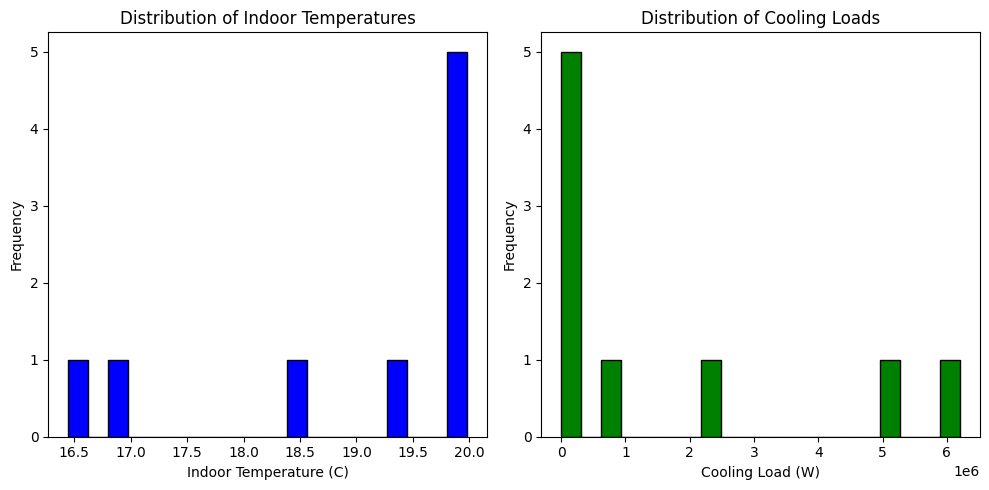

In [24]:
# plot the results of the simulation runs 
string_mean_air_temp_name = 'THERMAL ZONE 1:Zone Mean Air Temperature [C](TimeStep)'
string_cooling_load_name = 'THERMAL ZONE 1 IDEAL LOADS AIR SYSTEM:Zone Ideal Loads Zone Total Cooling Rate [W](TimeStep)'


import os
import pandas as pd
import matplotlib.pyplot as plt

# Pfad zum Verzeichnis der Simulationsergebnisse
simulation_dir = 'simulations'

# Funktion zum Extrahieren der Ergebnisse aus den Simulationen
def extract_results(simulation_dir, num_simulations):
    results = []
    for i in range(num_simulations):
        result_dir = os.path.join(simulation_dir, f'result_{i}')
        print(result_dir)
        output_csv = os.path.join(result_dir, 'eplusout.csv')  # Assuming the results are in eplusout.csv

        if os.path.exists(output_csv):
            data = pd.read_csv(output_csv)
            indoor_temp = data['THERMAL ZONE 1:Zone Mean Air Temperature [C](TimeStep)'].mean()  # Adjust column name as needed
            cooling_load = data['THERMAL ZONE 1 IDEAL LOADS AIR SYSTEM:Zone Ideal Loads Zone Total Cooling Rate [W](TimeStep)'].sum()  # Adjust column name as needed
            results.append((indoor_temp, cooling_load))
        else:
            print(f"Result file {output_csv} not found.")
    return results

# Extrahieren der Ergebnisse
num_simulations = 9  # Anzahl der Simulationen
results = extract_results(simulation_dir, num_simulations)

# Konvertieren der Ergebnisse in ein DataFrame
df = pd.DataFrame(results, columns=['Indoor Temperature (C)', 'Cooling Load (W)'])

# Plotten der Ergebnisse
plt.figure(figsize=(10, 5))

# Histogramm der Innentemperaturen
plt.subplot(1, 2, 1)
plt.hist(df['Indoor Temperature (C)'], bins=20, color='blue', edgecolor='black')
plt.title('Distribution of Indoor Temperatures')
plt.xlabel('Indoor Temperature (C)')
plt.ylabel('Frequency')

# Histogramm der Kühllasten
plt.subplot(1, 2, 2)
plt.hist(df['Cooling Load (W)'], bins=20, color='green', edgecolor='black')
plt.title('Distribution of Cooling Loads')
plt.xlabel('Cooling Load (W)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


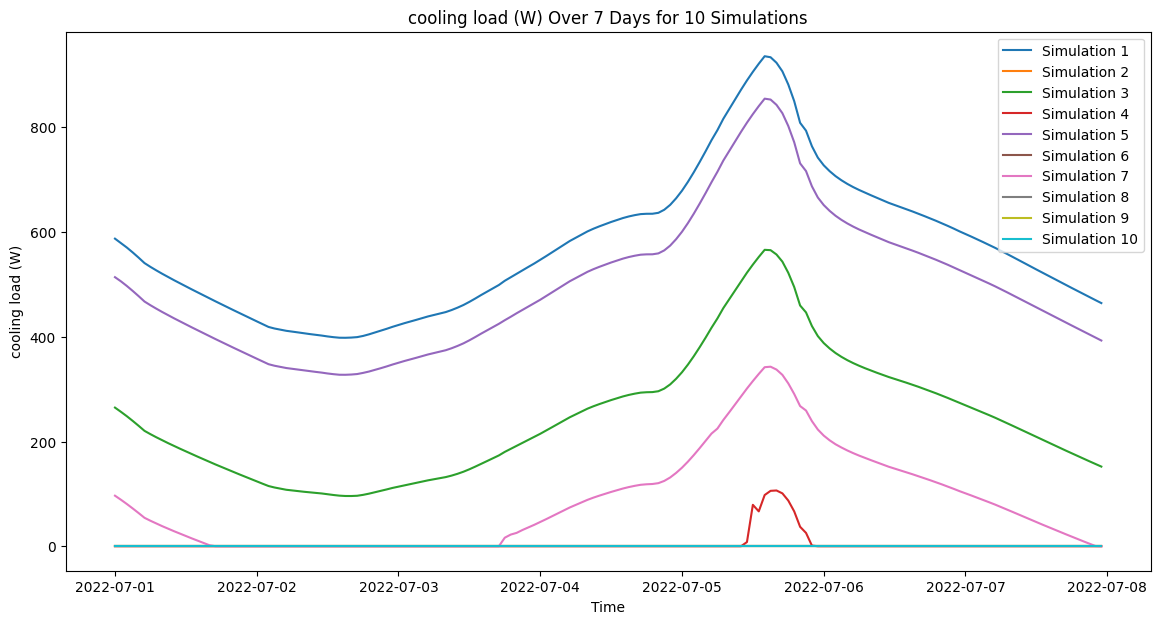

In [27]:
# Pfad zum Verzeichnis der Simulationsergebnisse
output_file = 'eplusout.csv'  # Anpassung des Dateinamens

# Funktion zum Extrahieren der Zeitreihendaten
def extract_time_series(simulation_dir, num_simulations, num_days=7):
    all_results = []
    for i in range(num_simulations):
        result_dir = os.path.join(simulation_dir, f'result_{i}')
        output_csv = os.path.join(result_dir, output_file)  # Pfad zur CSV-Datei

        if os.path.exists(output_csv):
            data = pd.read_csv(output_csv)
            # Filterung der Daten für die ersten 7 Tage (Annahme: stündliche Daten)
            data = data.iloc[:num_days*24, :]
            indoor_temp = data[string_cooling_load_name]  # Anpassung des Spaltennamens
            time = pd.date_range(start='7/1/2022', periods=len(indoor_temp), freq='h')
            all_results.append(pd.DataFrame({'Time': time, 'cooling load (W)': indoor_temp}))
        else:
            print(f"Result file {output_csv} not found.")
    return all_results

# Extrahieren der Zeitreihendaten
num_simulations = 10  # Anzahl der Simulationen (für dieses Beispiel 10)
results = extract_time_series(simulation_dir, num_simulations)

# Plotten der Zeitreihen
plt.figure(figsize=(14, 7))
for i, result in enumerate(results):
    plt.plot(result['Time'], result['cooling load (W)'], label=f'Simulation {i+1}')

plt.title('cooling load (W) Over 7 Days for 10 Simulations')
plt.xlabel('Time')
plt.ylabel('cooling load (W)')
plt.legend()
plt.show()